In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300

In [4]:
df_data = pd.read_csv("train_data.csv",header=None)
df_labels = pd.read_csv("train_labels.csv",header=None,names=["label"])
df_labels['label'].value_counts()


1     2178
2      618
3      326
6      260
4      253
5      214
8      195
7      141
9       92
10      86
Name: label, dtype: int64

## Creating the index for rhythm, chroma and MFCC

In [5]:
rhythm = list(range(24*7))
chroma = list(range(len(rhythm),len(rhythm)+12*4))
mfcc = list(range(len(chroma)+len(rhythm),len(chroma)+len(rhythm)+12*4))

## Feature Investigation space
Checking for random rows etc and seeing their usefulness

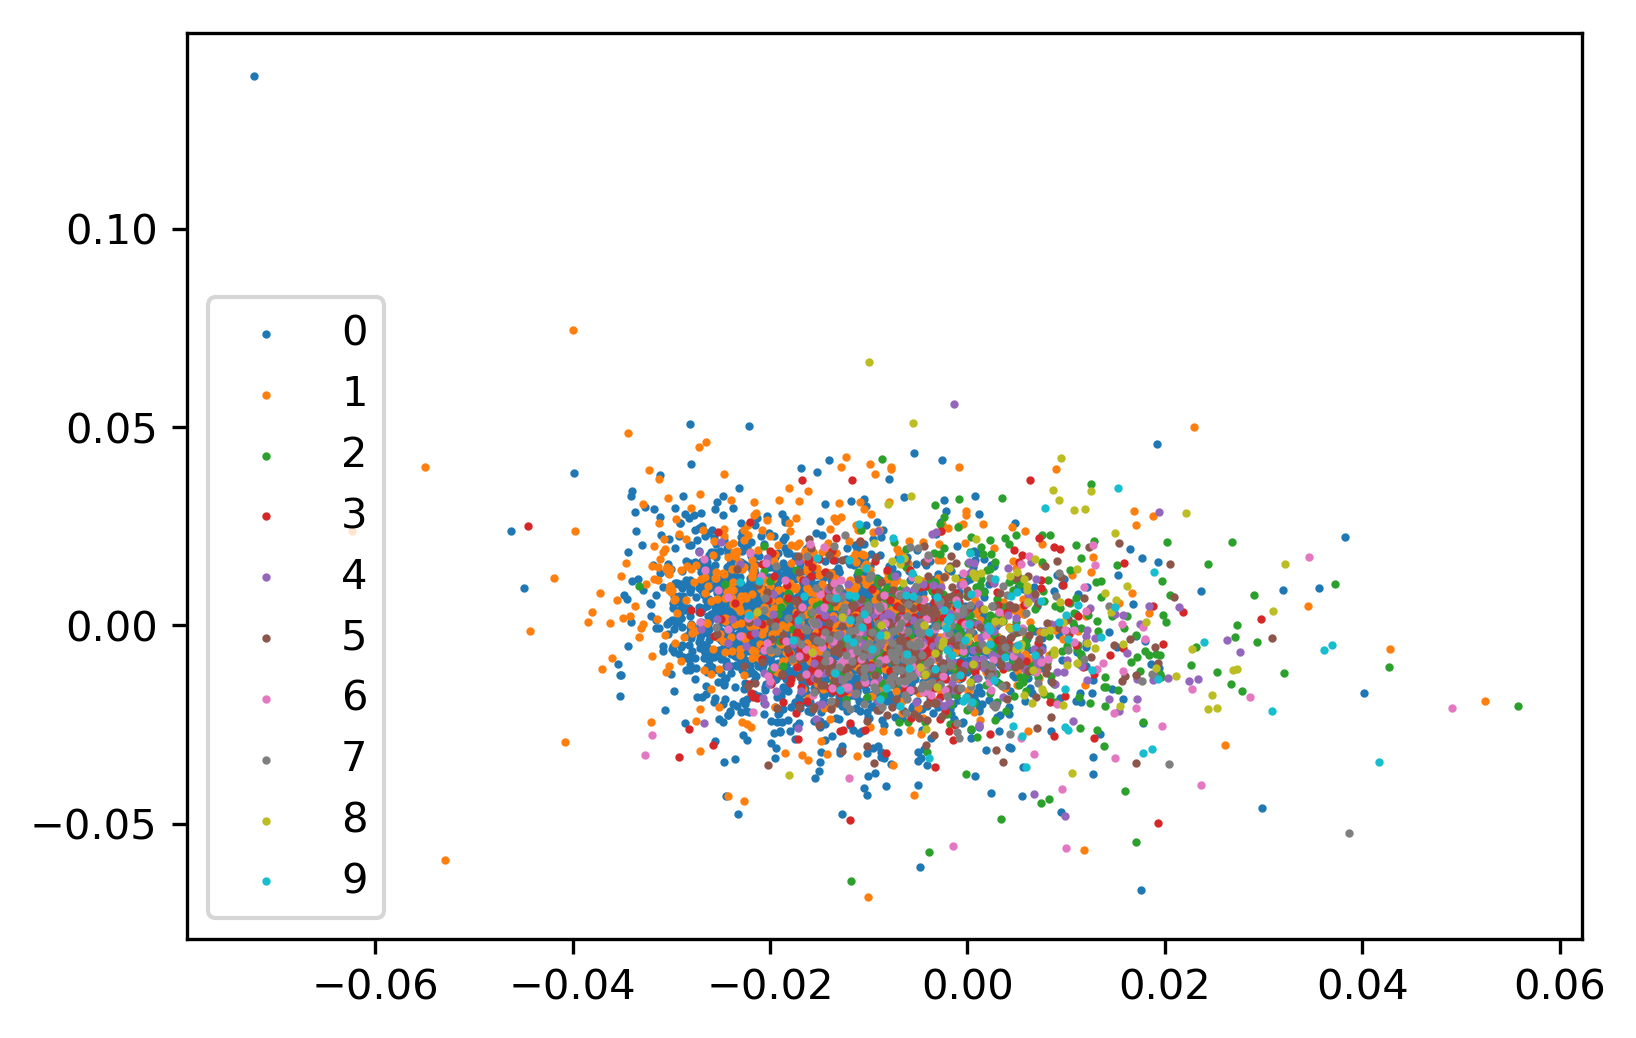

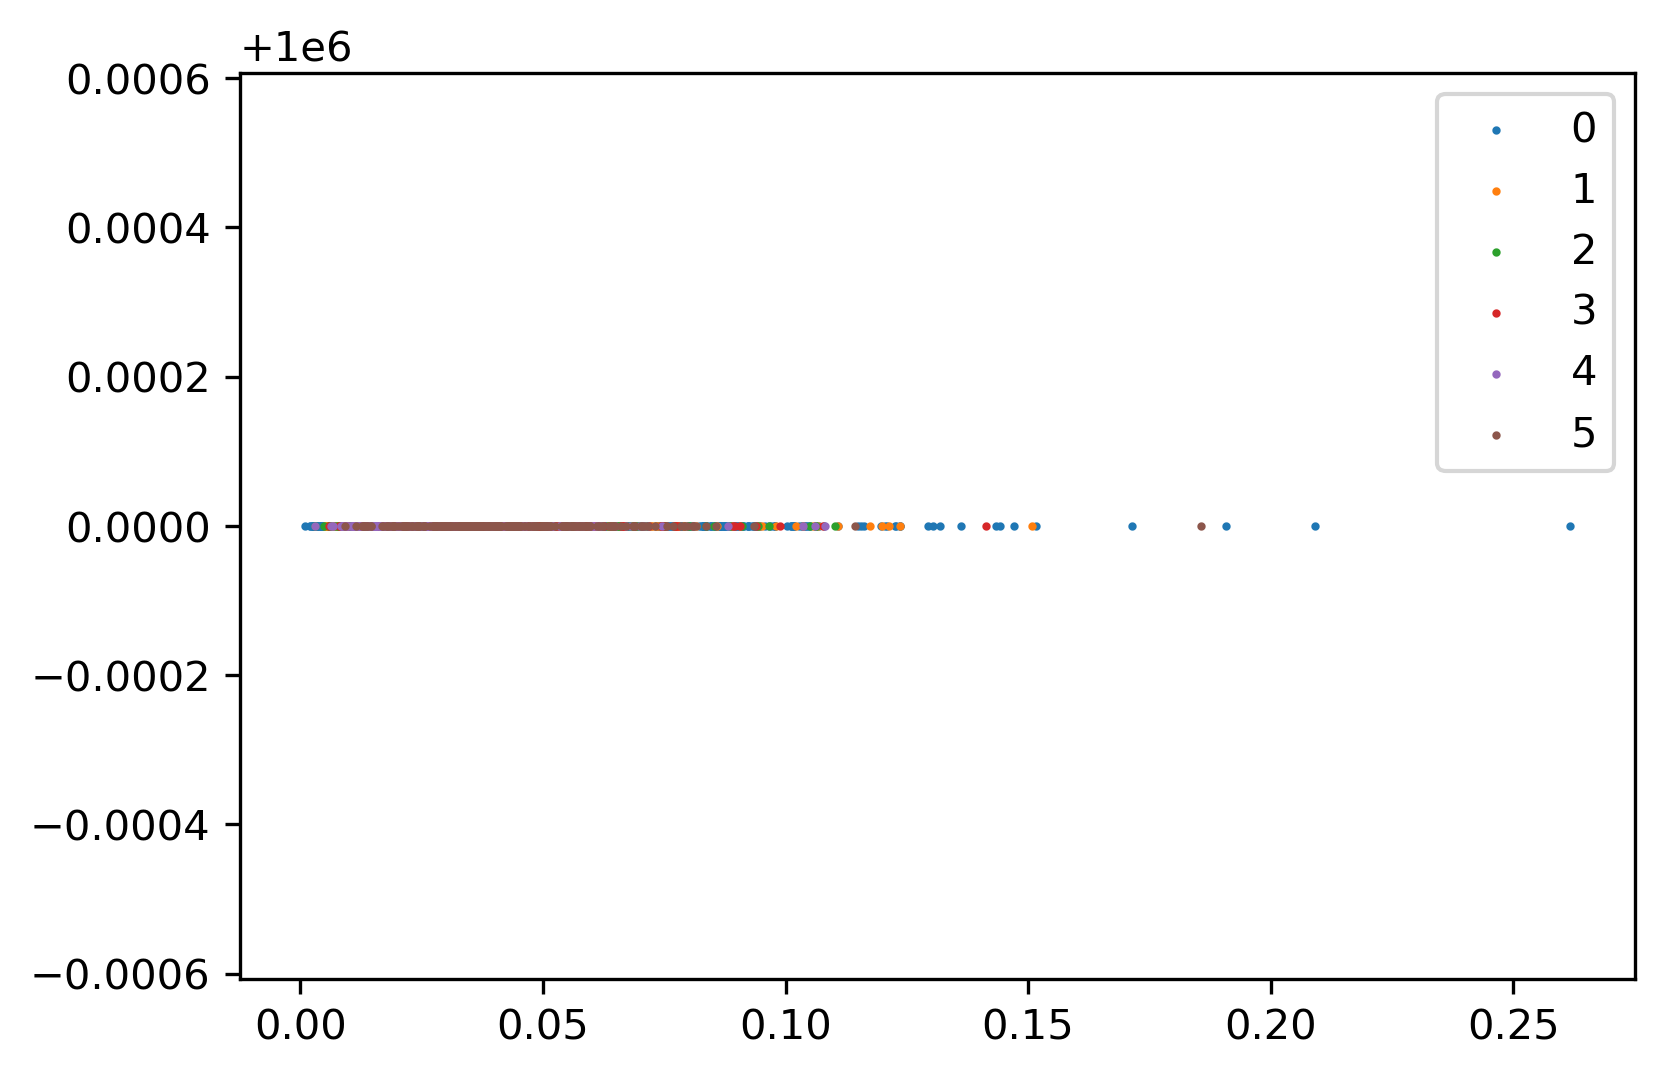

In [6]:
colors = ['red','green','blue','black','pink','yellow']

mfcc_means = df_data[:
                    ][mfcc[:12]].values
mfcc_std = df_data[:][mfcc[12:24]].values


for i in range(10):
    loc = np.argwhere(df_labels.values == i+1)
    plt.scatter(mfcc_means[loc,5],mfcc_means[loc,6],1,label=i)
plt.legend()
plt.show()
for i in range(6):
    loc = np.argwhere(df_labels.values == i+1)
    plt.scatter(mfcc_std[loc,0],mfcc_means[loc,1],1,label=i)
plt.legend()
plt.show()



In [7]:
chroma_mean=df_data[:][chroma[:12]]
chroma_mean['label']=df_labels['label']
avg = chroma_mean.groupby('label').mean()
avg.head()

,168,169,170,171,172,173,174,175,176,177,178,179
label,,,,,,,,,,,,
1,0.445692,0.442810,0.373671,0.310531,0.374130,0.330865,0.338921,0.360905,0.327200,0.362877,0.303136,0.350604
2,0.531916,0.525691,0.360122,0.336577,0.359684,0.352660,0.353875,0.375084,0.356115,0.352269,0.324072,0.340209
3,0.517368,0.537585,0.368629,0.343461,0.369674,0.374777,0.387408,0.385598,0.377923,0.381050,0.353405,0.344530
4,0.427761,0.403601,0.332269,0.282354,0.306108,0.318781,0.296246,0.345673,0.300197,0.324248,0.299585,0.277715
5,0.441797,0.428000,0.341444,0.280737,0.340934,0.311613,0.309219,0.346715,0.306651,0.353404,0.303047,0.329935


In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
mpl.rcParams['figure.dpi']=150

def plot3d(data,y_axis_label,z_axis_label):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    index = data.index
    columns = data.columns
    XX,YY = np.meshgrid(index,columns)

    c = np.array([np.repeat(i,len(columns)) for i in index]).T
    p=ax.scatter(XX,YY,data.values.T,c=c.flatten(),cmap='Spectral')

    cmap = mpl.cm.get_cmap('Spectral')
    norm = mpl.colors.Normalize(vmin=1, vmax=10)

    dummy = [mpl.lines.Line2D([],[],color=cmap(norm(i)),linestyle='None',marker='.') for i in range(1,len(index)+1)]
    ax.set_xticks([])
    classes = ['Pop_Rock','Electronic','Rap', 'Jazz','Latin','RnB','International','Country','Reggae','Blues']
    ax.legend(dummy,classes,fontsize='xx-small',title="Classes")
    ax.set_yticks(columns)
    ax.tick_params(axis='y',labelsize='xx-small')
    ax.set_yticklabels(range(1,len(columns)+1))
    ax.set_ylabel(y_axis_label)
    ax.set_zlabel(z_axis_label)
    ax.view_init(elev=10,azim=0)
    plt.show()



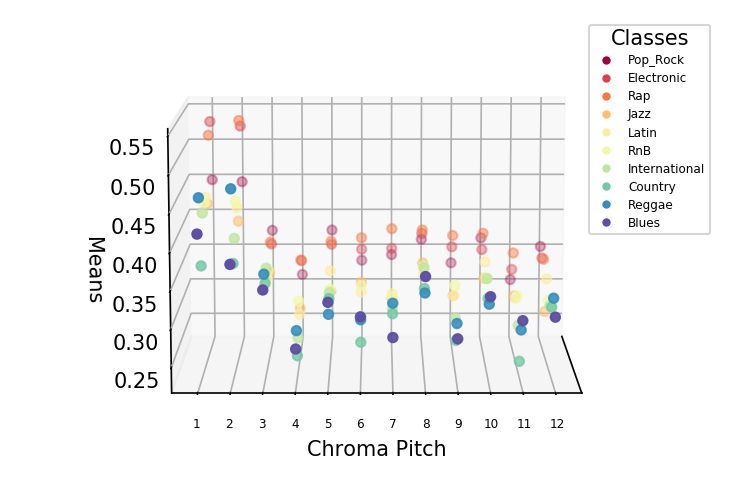

In [13]:
chroma_mean=df_data[:][chroma[:12]]
chroma_mean['label']=df_labels['label']
avg = chroma_mean.groupby('label').mean()
plot3d(data=avg,y_axis_label='Chroma Pitch',z_axis_label='Means')


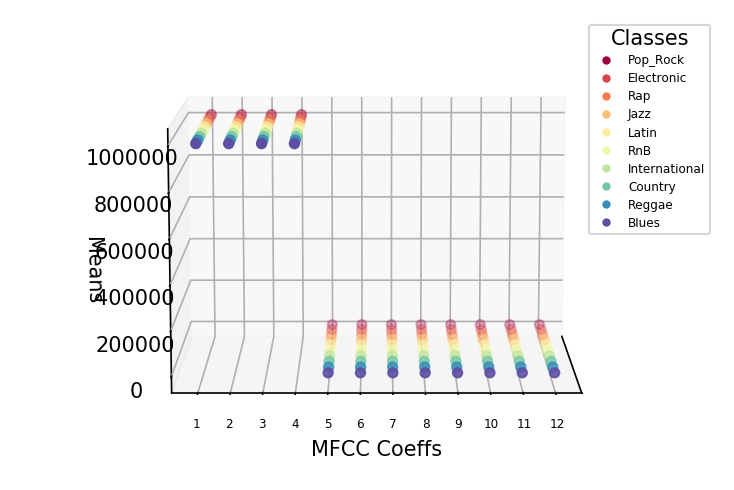

In [16]:
mfcc_mean=df_data[:][mfcc[:12]]
mfcc_mean['label']=df_labels['label']
avg = mfcc_mean.groupby('label').mean()
plot3d(data=avg,y_axis_label='MFCC Coeffs',z_axis_label='Means')`

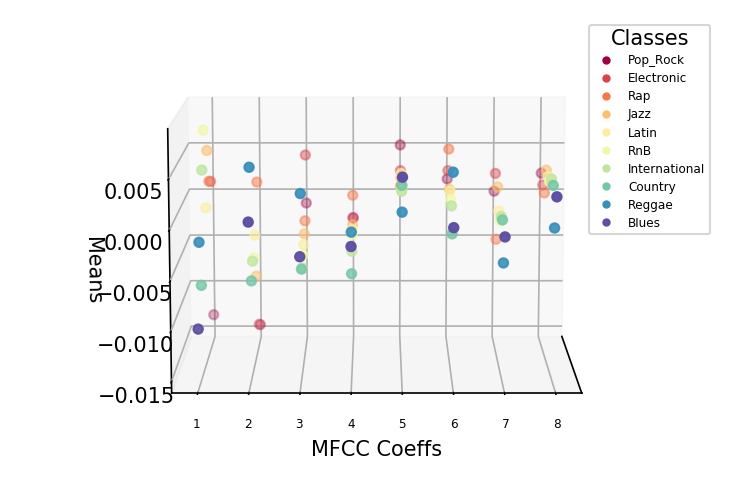

In [17]:
mfcc_mean=df_data[:][mfcc[4:12]]
mfcc_mean['label']=df_labels['label']
avg = mfcc_mean.groupby('label').mean()
plot3d(data=avg,y_axis_label='MFCC Coeffs',z_axis_label='Means')

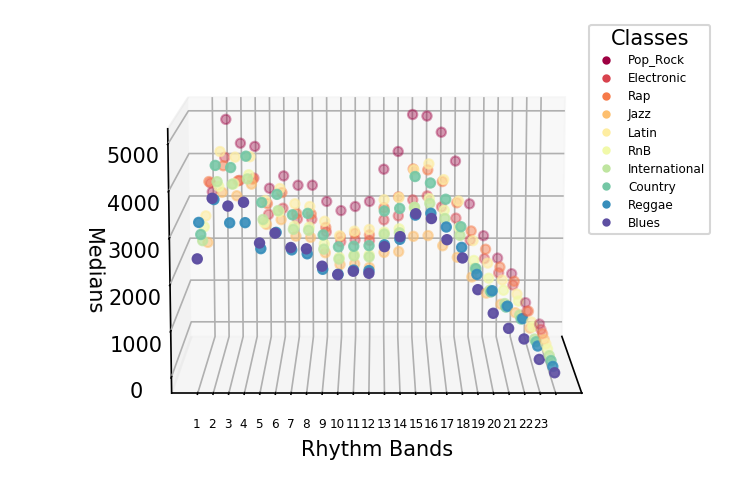

In [65]:
rhythm_mean=df_data[:][rhythm[:24]]
rhythm_mean['label']=df_labels['label']
avg = rhythm_mean.groupby('label').mean()
plot3d(data=avg,y_axis_label='Rhythm Bands',z_axis_label='Medians')

## The first 4 coefficients of MFCC seem to have corrupted mean data

In [15]:
df_data[:][mfcc[:12]].head()

,216,217,218,219,220,221,222,223,224,225,226,227
0,1000000.0,1000000.0,1000000.0,1000000.0,0.001894,-0.002000,0.001301,0.001159,-0.006528,-0.001903,0.001681,0.009920
1,1000000.0,1000000.0,1000000.0,1000000.0,-0.002680,-0.027749,0.027858,0.002513,0.014589,0.007545,-0.002405,0.015146
2,1000000.0,1000000.0,1000000.0,1000000.0,-0.001637,0.006803,-0.001520,-0.006899,0.001273,-0.006530,-0.000797,-0.001442
3,1000000.0,1000000.0,1000000.0,1000000.0,-0.026825,-0.023088,-0.003284,-0.003447,-0.004121,0.002818,0.001818,-0.002063
4,1000000.0,1000000.0,1000000.0,1000000.0,-0.014689,-0.022217,-0.009048,0.001094,0.016120,0.004603,0.000799,0.009655


## The Chroma Max Values almost always are 1

In [16]:
df_data[:][chroma[36:48]].head()

,204,205,206,207,208,209,210,211,212,213,214,215
0,1.0,1.0,1.000,1.0,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.000,1.0,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.000,1.0,1.0,1.000,0.998,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.945,1.0,1.0,0.899,1.000,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.000,1.0,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0


## Cleaning the 4 MFCC coeffients from the database

In [18]:
def clean_data(data):
    rhythm = list(range(24*7))
    chroma = list(range(len(rhythm),len(rhythm)+12*4))
    mfcc = list(range(len(chroma)+len(rhythm),len(chroma)+len(rhythm)+12*4))
    #The first 4 columns of MFCC
    remove = np.array([0,1,2,3])
    remove = np.array([remove+i*12 for i in range(4)])
    remove = remove.flatten()
    remove = np.array(mfcc)[remove]
    clean_data = data.drop(remove,axis=1)
    return clean_data

In [19]:
df_data_clean = clean_data(data=df_data)
df_data_clean

,0,1,2,3,4,5,6,7,8,9,...,250,251,256,257,258,259,260,261,262,263
0,1040.70,2315.60,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.30,1706.70,...,-0.055849,-0.052800,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.40,4780.40,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.00,3374.70,...,-0.076446,-0.044675,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.90,4607.00,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.00,1895.20,...,-0.066073,-0.058104,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.90,6274.40,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.70,3075.40,...,-0.114900,-0.051899,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.60,3351.80,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.40,1911.70,...,-0.048651,-0.072050,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813
5,1229.80,3005.80,2818.4,2640.1,2329.1,2568.4,2772.1,3119.3,2505.80,2085.00,...,-0.031886,-0.062968,0.078278,0.058903,0.051245,0.049138,0.070669,0.067383,0.053383,0.037763
6,3936.10,6276.30,4768.8,4157.2,3658.2,3830.3,4421.3,3712.8,3419.90,3437.60,...,-0.084218,-0.040411,0.033861,0.033922,0.072498,0.153120,0.042135,0.104470,0.040248,0.028059
7,556.39,1739.00,2072.0,2713.0,1828.7,2875.6,1739.8,1430.2,1531.40,785.59,...,-0.068315,-0.041432,0.119490,0.164570,0.041037,0.118390,0.076247,0.079585,0.051912,0.094960
8,2764.70,4442.60,3930.6,3504.1,2421.8,3012.6,3154.7,2665.7,2846.50,2595.20,...,-0.121850,-0.063557,0.039843,0.085944,0.062147,0.128530,0.070850,0.054834,0.127700,0.057441
9,3084.70,5645.90,5000.2,4001.9,2761.3,2946.5,2998.7,3141.1,3211.80,3374.60,...,-0.081764,-0.024521,0.018940,0.230170,0.069801,0.041104,0.038691,0.078276,0.074719,0.059803


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.combine import SMOTEENN


def normalize(data):
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    norm_data = pd.DataFrame(x_scaled)
    return norm_data

def get_splits(data,labels,test_size=0.3,random_state=0,smote=False):
    data_norm = normalize(data=data)
    X = data_norm.values
    y = labels.label.values
    X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=test_size, random_state=random_state)
    if smote ==False:
        return X_train,X_test,y_train,y_test
    sm = SMOTEENN(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    return train_test_split(X_res,y_res, test_size=test_size, random_state=random_state)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score

def test_classifier(clf,data,labels,smote=False):
    X_train, X_test, y_train,y_test = get_splits(data=data,labels=df_labels,smote=smote)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm = cm / cm.astype(np.float).sum(axis=1)
    score = clf.score(X_test,y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score for classifier{1} is {0}'.format(score,clf)
    plt.title(all_sample_title, size = 15)
    plt.show()
    print(classification_report(y_test, y_pred))
    
def get_cv_score(clf,data,labels):
    X_train, X_test, y_train,y_test = get_splits(data=df_data_clean,labels=df_labels)
    scores = cross_val_score(clf, X_train,y_train, cv=5,scoring='f1_weighted')
    print("Accuracy for model %s : %0.2f (+/- %0.2f)" % (clf,scores.mean(), scores.std() * 2))
    

In [128]:
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=1)
log_clf = LogisticRegressionCV(solver='newton-cg',multi_class='auto',max_iter=600,cv=5)

test_classifier(ada_clf,df_data_clean,df_labels,smote=False)


KeyboardInterrupt: 

In [54]:
kaggle = pd.read_csv('test_data.csv',header=None)
kaggle.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,3115.5,3151.9,2742.2,3236.8,2580.6,2662.6,2372.2,2569.6,2310.7,2502.1,...,0.202000,0.27811,0.138290,0.16759,0.106690,0.135000,0.087223,0.115030,0.074181,0.082354
1,2055.0,3225.7,2273.5,3601.9,1959.3,2212.3,1720.4,1640.4,1157.1,1132.5,...,0.095165,0.17908,0.134300,0.14612,0.062988,0.113780,0.076223,0.105320,0.104750,0.067400
2,1601.2,3768.1,3591.0,3452.4,2935.9,2913.4,2479.6,2108.8,1823.8,1711.3,...,0.114550,0.30952,0.096229,0.10636,0.037123,0.085613,0.051728,0.074393,0.047407,0.043231
3,2745.0,4585.8,4246.0,3937.6,3423.9,4108.2,3096.5,3469.6,3002.5,3525.0,...,0.112300,0.42906,0.057022,0.16610,0.057594,0.127360,0.017878,0.075741,0.092060,0.028369
4,1515.0,2403.5,2461.6,2399.1,1999.4,2195.8,2123.0,2030.7,1737.4,1875.5,...,0.098629,0.27692,0.057491,0.24435,0.039830,0.050223,0.045778,0.078015,0.067199,0.043448


In [55]:
remove = np.array([0,1,2,3])
remove = np.array([remove+i*12 for i in range(4)])
remove = remove.flatten()
tmp=np.array(mfcc)[remove]
kaggle_clean = kaggle.drop(tmp,axis=1)
kaggle_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,256,257,258,259,260,261,262,263
0,3115.5,3151.9,2742.2,3236.8,2580.6,2662.6,2372.2,2569.6,2310.7,2502.1,...,-0.092074,-0.073598,0.138290,0.16759,0.106690,0.135000,0.087223,0.115030,0.074181,0.082354
1,2055.0,3225.7,2273.5,3601.9,1959.3,2212.3,1720.4,1640.4,1157.1,1132.5,...,-0.083141,-0.065957,0.134300,0.14612,0.062988,0.113780,0.076223,0.105320,0.104750,0.067400
2,1601.2,3768.1,3591.0,3452.4,2935.9,2913.4,2479.6,2108.8,1823.8,1711.3,...,-0.068878,-0.052731,0.096229,0.10636,0.037123,0.085613,0.051728,0.074393,0.047407,0.043231
3,2745.0,4585.8,4246.0,3937.6,3423.9,4108.2,3096.5,3469.6,3002.5,3525.0,...,-0.045110,-0.046005,0.057022,0.16610,0.057594,0.127360,0.017878,0.075741,0.092060,0.028369
4,1515.0,2403.5,2461.6,2399.1,1999.4,2195.8,2123.0,2030.7,1737.4,1875.5,...,-0.136950,-0.032865,0.057491,0.24435,0.039830,0.050223,0.045778,0.078015,0.067199,0.043448


In [56]:
x = kaggle_clean.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
kaggle_norm = pd.DataFrame(x_scaled)

kaggle_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,0.325671,0.318352,0.275084,0.360727,0.352168,0.301016,0.290326,0.319285,0.287517,0.381259,...,0.557117,0.437051,0.486417,0.517339,0.402325,0.526549,0.517954,0.587300,0.373196,0.472935
1,0.214776,0.325808,0.228048,0.401429,0.267345,0.250088,0.210519,0.203780,0.143910,0.172476,...,0.602714,0.476380,0.474972,0.460049,0.231821,0.432787,0.459747,0.531813,0.553450,0.385840
2,0.167323,0.380611,0.360264,0.384763,0.400674,0.329381,0.303477,0.262005,0.226905,0.260709,...,0.675518,0.544456,0.365764,0.353953,0.130908,0.308329,0.330130,0.355081,0.215321,0.245076
3,0.286928,0.463229,0.425996,0.438854,0.467298,0.464512,0.379011,0.431161,0.373636,0.537190,...,0.796837,0.579075,0.253297,0.513363,0.210776,0.492791,0.151011,0.362784,0.478622,0.158517
4,0.158309,0.242735,0.246924,0.267338,0.272820,0.248222,0.259814,0.252297,0.216149,0.285740,...,0.328055,0.646708,0.254643,0.722166,0.141469,0.151955,0.298645,0.375779,0.332026,0.246340


In [89]:
kaggle_pred = log_clf.predict(kaggle_norm)
result = pd.DataFrame(data=kaggle_pred,columns=["Sample_label",])
result['Sample_id'] = result.index+1
output = pd.DataFrame()
output['Sample_id'] = result['Sample_id']
output['Sample_label'] = result['Sample_label']
output

,Sample_id,Sample_label
0,1,4
1,2,7
2,3,1
3,4,1
4,5,1
5,6,8
6,7,6
7,8,1
8,9,1
9,10,2


## Write the output file 

In [58]:
file_name = "accuracy_solution_21_Oct_3.csv"
output.to_csv(file_name,index=False)


In [103]:
t1 = pd.read_csv('accuracy_solution_21_Oct_3.csv')
t2 = pd.read_csv('accuracy_solution_21_Oct_2.csv')
sum(t2['Sample_label']!=output['Sample_label'])

0


0

In [122]:
kaggle_log_pred = log_clf.predict_proba(kaggle_norm)
result_log = pd.DataFrame(data=kaggle_log_pred,columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9','Class_10'])
result_log['Sample_id'] = result_log.index+1
cols = result_log.columns.tolist()
cols = [cols[-1]]+cols[:-1]
result_log = result_log[cols]
result_log


,Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10
0,1,0.097639,0.110867,0.119102,0.224076,0.052325,0.120746,0.166497,0.003560,0.075164,0.030023
1,2,0.066057,0.084437,0.110313,0.159311,0.043151,0.096098,0.231940,0.009561,0.157866,0.041267
2,3,0.658003,0.072361,0.000667,0.010714,0.028545,0.040363,0.028447,0.125862,0.002011,0.033027
3,4,0.893746,0.097554,0.002046,0.000179,0.000679,0.000096,0.002979,0.001194,0.000049,0.001478
4,5,0.897940,0.026363,0.001663,0.009848,0.002917,0.018792,0.003834,0.017641,0.001382,0.019619
5,6,0.156684,0.008834,0.001616,0.045435,0.207302,0.106939,0.045658,0.408881,0.002924,0.015726
6,7,0.095362,0.062369,0.012173,0.129602,0.068963,0.281138,0.054375,0.010490,0.271813,0.013716
7,8,0.428375,0.047097,0.000168,0.035577,0.206971,0.006590,0.098294,0.140306,0.006625,0.029998
8,9,0.910064,0.004935,0.000933,0.001437,0.012886,0.009977,0.011378,0.044027,0.001112,0.003251
9,10,0.203970,0.705216,0.011140,0.016600,0.005756,0.004054,0.004320,0.012444,0.031385,0.005115


In [123]:
file_name = "logloss_solution_21_Oct_3.csv"
result_log.to_csv(file_name,index=False)

In [19]:
np.logspace(0,3,10)

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])